<a href="https://colab.research.google.com/github/PatricioSaavedraV/Movie-Correlation-project/blob/main/Movie_Correlation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataSet: https://www.kaggle.com/datasets/danielgrijalvas/movies

In [ ]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) # Adjusts the configuration of the plots we will create

In [ ]:
# Read in the data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRbRJHDHmlwQ8xcGya5Eq5QAdwJGCGtewpjmc9J1BYK3Ic_FgQ3e81hrui2h7j7NIfQWd9zn4VkwfrY/pub?output=csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000,7665.000,7.665e+03,5.497e+03,7.479e+03,7664.000
mean,2000.405,6.390,8.811e+04,3.559e+07,7.850e+07,107.262
std,11.154,0.969,1.633e+05,4.146e+07,1.657e+08,18.581
min,1980.000,1.900,7.000e+00,3.000e+03,3.090e+02,55.000
25%,1991.000,5.800,9.100e+03,1.000e+07,4.532e+06,95.000
50%,2000.000,6.500,3.300e+04,2.050e+07,2.021e+07,104.000
75%,2010.000,7.100,9.300e+04,4.500e+07,7.602e+07,116.000
max,2020.000,9.300,2.400e+06,3.560e+08,2.847e+09,366.000


In [ ]:
# Let's see if there is any missing data
def perc_null_values(df):
  perc_null = (df.isnull().sum()/len(df))*100
  return perc_null.round(2)

perc_null = perc_null_values(df)
perc_null

name         0.00
rating       1.00
genre        0.00
year         0.00
released     0.03
score        0.04
votes        0.04
director     0.00
writer       0.04
star         0.01
country      0.04
budget      28.31
gross        2.46
company      0.22
runtime      0.05
dtype: float64

In [ ]:
# In some variables (except budget) with missing data, we can use mean
def mean(df, var):
  mean = df[var].mean()
  return mean

In [ ]:
# mean
df['score'] = df['score'].fillna(mean(df, 'score'))
df['votes'] = df['votes'].fillna(mean(df, 'votes'))
df['gross'] = df['gross'].fillna(mean(df, 'gross'))
df['runtime'] = df['runtime'].fillna(mean(df, 'runtime'))

In [ ]:
# for the others variables we can drop all rows
df = df.dropna()

In [ ]:
perc_null = perc_null_values(df)
perc_null

name        0.0
rating      0.0
genre       0.0
year        0.0
released    0.0
score       0.0
votes       0.0
director    0.0
writer      0.0
star        0.0
country     0.0
budget      0.0
gross       0.0
company     0.0
runtime     0.0
dtype: float64

In [ ]:
# Data typs for out columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
# Change data type of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,9.270e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,6.500e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1.200e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,2.210e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,1.080e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [ ]:
#Create correct Year column
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [ ]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
# Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

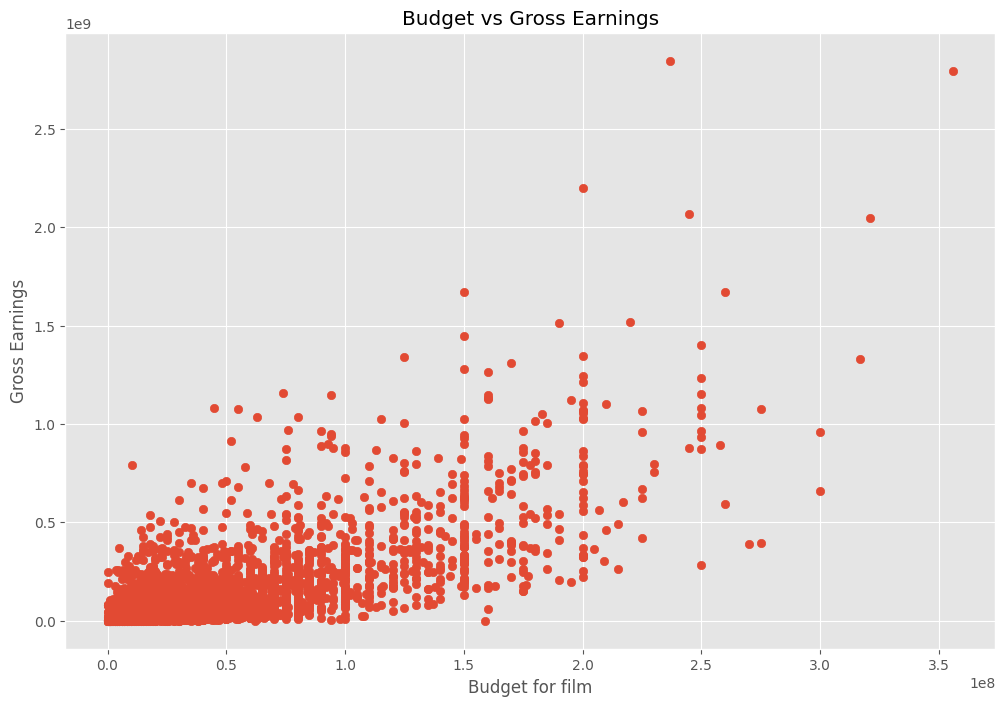

In [ ]:
# Scatter plot with budged vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')

plt.show()

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<Axes: xlabel='budget', ylabel='gross'>

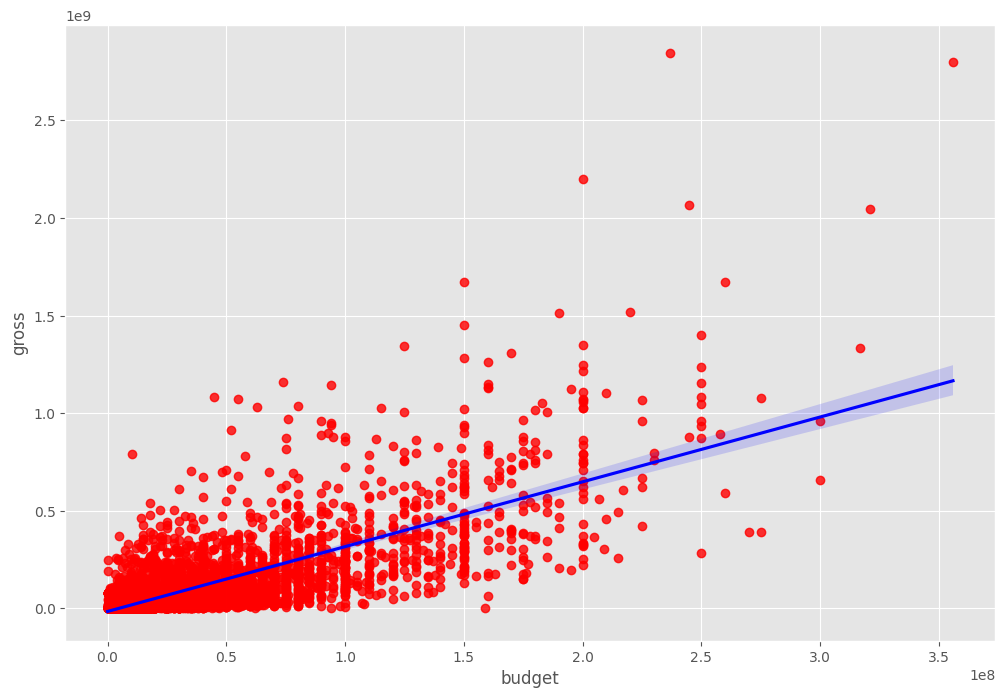

In [ ]:
# Plot Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [ ]:
# Let's start looking at correlation
df.corr(numeric_only=True, method='pearson')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.064182,0.209932,0.330853,0.272517,0.078817,0.998740
score,0.064182,1.000000,0.473079,0.076144,0.221290,0.417456,0.069645
votes,0.209932,0.473079,1.000000,0.441783,0.614433,0.352353,0.207015
budget,0.330853,0.076144,0.441783,1.000000,0.738977,0.320169,0.323544
gross,0.272517,0.221290,0.614433,0.738977,1.000000,0.274492,0.267026
runtime,0.078817,0.417456,0.352353,0.320169,0.274492,1.000000,0.079063
yearcorrect,0.998740,0.069645,0.207015,0.323544,0.267026,0.079063,1.000000


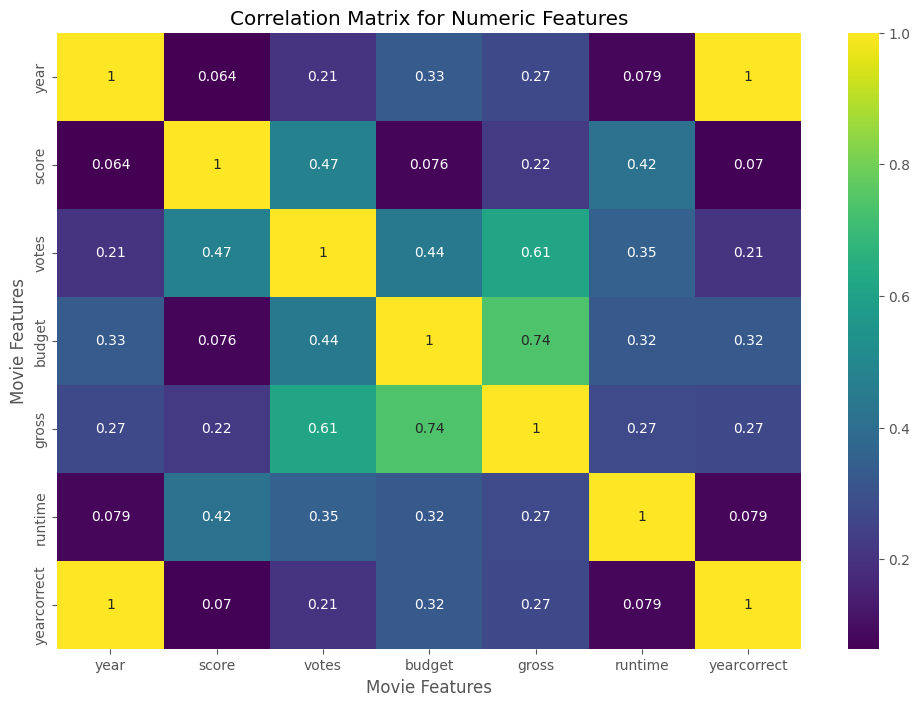

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap ='viridis')
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [50]:
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs)>0.5], sorted_pairs[(sorted_pairs) < -0.5]
high_corr

(gross        votes          0.614433
 votes        gross          0.614433
 budget       gross          0.738977
 gross        budget         0.738977
 yearcorrect  year           0.998740
 year         yearcorrect    0.998740
 name         name           1.000000
 company      company        1.000000
 gross        gross          1.000000
 budget       budget         1.000000
 country      country        1.000000
 star         star           1.000000
 writer       writer         1.000000
 director     director       1.000000
 votes        votes          1.000000
 score        score          1.000000
 released     released       1.000000
 year         year           1.000000
 genre        genre          1.000000
 rating       rating         1.000000
 runtime      runtime        1.000000
 yearcorrect  yearcorrect    1.000000
 dtype: float64,
 Series([], dtype: float64))

In [ ]:
# Votes and budget have the highest correlation to gross earnings
# Company has low correlation